In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 2



# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [2]:
# Loading the dataset
location = r"C:\Users\madhu\Kaggle_kernels\datasets\hotel_bookings.csv"
bookings = pd.read_csv(location)
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# hotel                       = Hotel (H1 = Resort Hotel or H2 = City Hotel)
# is_canceled                 = Value indicating if the booking was canceled (1) or not (0)
# lead_time                   = Number of days that elapsed between the entering date of the booking into the PMS and the 
#                               arrival date
# arrival_date_year           = Year of arrival date
# arrival_date_month          = Month of arrival date
# stays_in_weekend_nights     = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
# stays_in_week_nights        = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# adults                      = Number of adults
# children                    = Number of children
# babies                      = Number of babies
# meal                        = Type of meal booked. Categories are presented in standard hospitality meal packages: 
#                               Undefined/SC – no meal package; 
#                                  BB – Bed & Breakfast; 
#                                  HB – Half board (breakfast and one other meal – usually dinner); 
#                                  FB – Full board (breakfast, lunch and dinner)
# country                     = Country of origin. Categories are represented in the ISO 3155–3:2013 format    
# market_segment              = Market segment designation. In categories, the term 
#                               “TA” means “Travel Agents” and “TO” means “Tour Operators”
# distribution_channel        = Booking distribution channel. The term 
#                               “TA” means “Travel Agents” and “TO” means “Tour Operators”
# is_repeated_guest           = Value indicating if the booking name was from a repeated guest (1) or not (0)
# previous_cancellations      = Number of previous bookings that were cancelled by the customer prior to the current booking
# previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking
# reserved_room_type          = Code of room type reserved. Code is presented instead of designation for anonymity reasons
# assigned_room_type          = Code for the type of room assigned to the booking. Sometimes the assigned room type differs 
#                               from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer 
#                               request. Code is presented instead of designation for anonymity reasons.
# booking_changes             = Number of changes/amendments made to the booking from the moment the booking was entered on the 
#                               PMS until the moment of check-in or cancellation
# deposit_type                = Indication on if the customer made a deposit to guarantee the booking. This variable can assume 
#                               three categories: 
#                                  No Deposit – no deposit was made; 
#                                  Non Refund – a deposit was made in the value of the total stay cost; 
#                                  Refundable – a deposit was made with a value under the total cost of stay.
# agent                       = ID of the travel agency that made the booking
# company                     = ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
# days_in_waiting_list        = Number of days the booking was in the waiting list before it was confirmed to the customer
# customer_type               = Type of booking, assuming one of four categories:
#                                   Contract - when the booking has an allotment or other type of contract associated to it; 
#                                   Group – when the booking is associated to a group; 
#                                   Transient – when the booking is not part of a group or contract, and is not associated 
#                                               to other transient booking; 
#                                   Transient-party – when the booking is transient, but is associated to at least other transient 
#                                                     booking
# adr                         = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights            
# required_car_parking_spaces = Number of car parking spaces required by the customer
# total_of_special_requests   = Number of special requests made by the customer (e.g. twin bed or high floor)
# reservation_status          = Reservation last status, assuming one of three categories: 
#                                   Canceled – booking was canceled by the customer; 
#                                   Check-Out – customer has checked in but already departed; 
#                                   No-Show – customer did not check-in and did inform the hotel of the reason why
# reservation_status_date     = Date at which the last status was set. This variable can be used in conjunction with the 
#                               ReservationStatus to understand when was the booking canceled or when did the customer 
#                               checked-out of the hotel

In [4]:
# Dataset information
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [5]:
#Statistics of the data
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


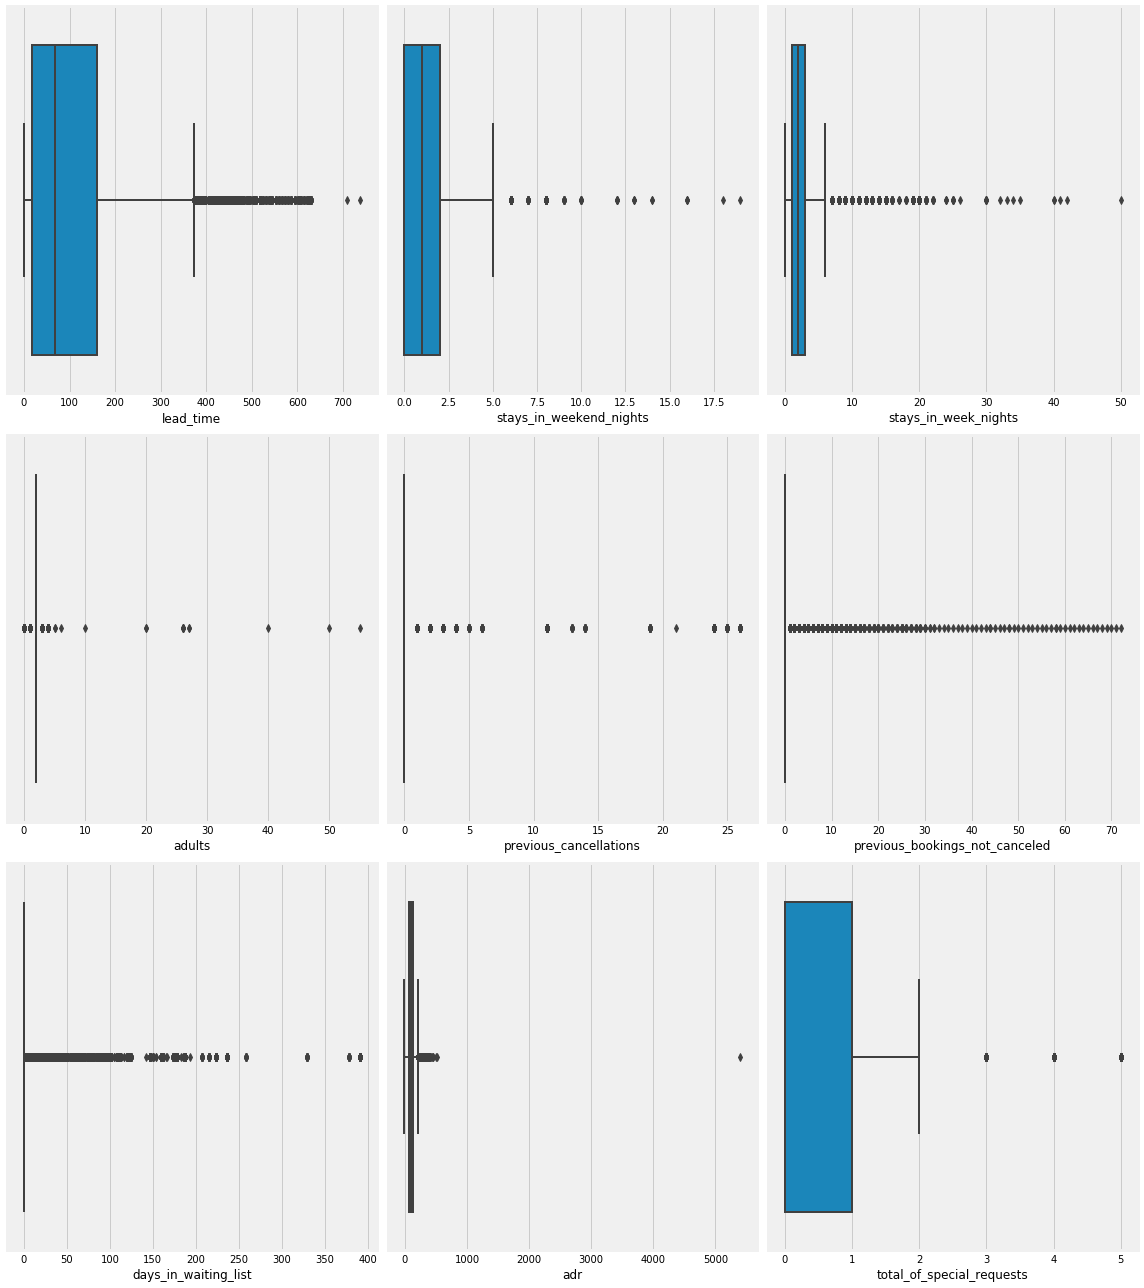

In [6]:
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
            'days_in_waiting_list', 'adr', 'total_of_special_requests']
# Outlier detection
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(3,3,n)
    sns.boxplot(bookings[feature])
    n+=1
    plt.tight_layout()
    #plt.show()

Statistics shows that there are many Outliers. They will be deleted eventually during the preprocessing

In [7]:
# Check for the missing data
bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We drop the unwanted columns first, then modify the remaining columns to extract hidden infiormations

In [8]:
# Some datas are missing large in number, and can be conveniently dropped
bookings.drop(['agent', 'company', 'arrival_date_week_number'], axis=1, inplace=True)

In [9]:
# Lets look into the numbers of children accompanying the adults since there are a few missing values in children
bookings.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [10]:
#Majority of the visitors were not accompanied by children and hence missing data can be replaced by number of children = 0
bookings.children.fillna(value=0.0, inplace=True)

### Extracting the continents

In [11]:
# Iterating the country column by running CountryCoverter revealded that, most of theclients were from Europe. Therefore all missing values are replaced with some contryname 
# from the continent Europe. later we would seggregate them by their respective continent)
bookings.country.fillna(value='PRT', inplace=True)

In [12]:
#Lets now convert all the countries to their respective continents. For doing so we would add a new column 'continent' and 
# allocate an arbitrary value to all the cells
#bookings['continent'] = 'abc'
import country_converter as coco
cc = coco.CountryConverter()
continents = []
for index, row in bookings.iterrows():
    continent = cc.convert([row.country], to='continent')
    #bookings.replace(bookings.loc[index]['continent'], continent, inplace=True)
    continents.append(continent)
cont_df = pd.DataFrame(continents, columns=['continent'])
bookings = pd.concat([bookings, cont_df], 1)

In [13]:
bookings.continent.value_counts()

Europe        108314
America         4982
Asia            4468
Africa          1114
Oceania          507
not found          3
Antarctica         2
Name: continent, dtype: int64

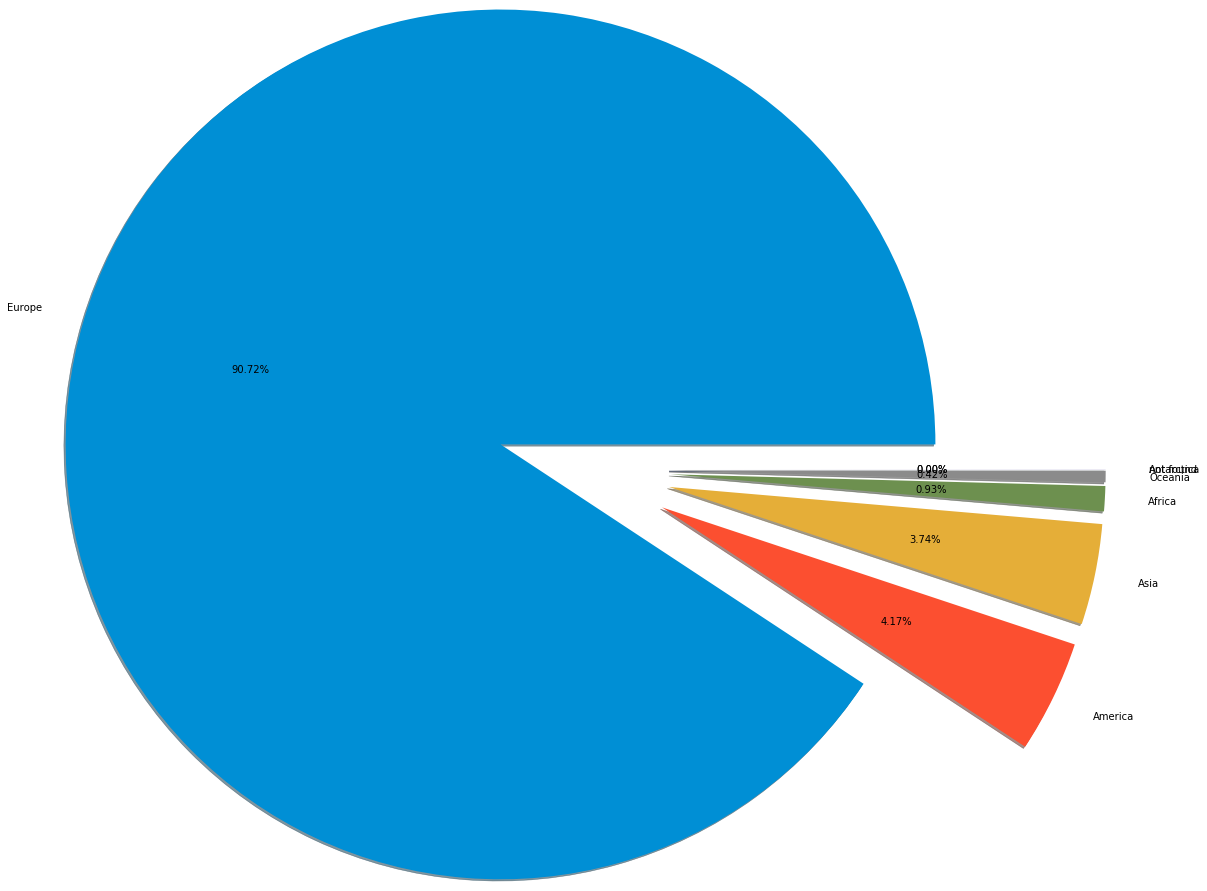

In [14]:
# visualization of continent-wise visitor distribution 
fig, ax = plt.subplots()
plt.axis('equal')
ax.pie(bookings.continent.value_counts(), labels=bookings.continent.value_counts().index, radius=5, autopct='%.2f%%', 
       shadow=True, explode=[1,1,1,1,1,1,1])
plt.show()

In [15]:
# Bookings with babies and childres are taken as a single entity
bookings['kids'] = bookings.children + bookings.babies
bookings['total_members'] = bookings.kids + bookings.adults

In [16]:
bookings['arrival_date_year'] = bookings['arrival_date_year'].astype('str')
bookings['arrival_date_month'] = bookings['arrival_date_month'].astype('str')
bookings['arrival_date_day_of_month'] = bookings['arrival_date_day_of_month'].astype('str')

In [17]:
bookings['is_canceled'] = bookings['is_canceled'].astype('str')
bookings['is_repeated_guest'] = bookings['is_repeated_guest'].astype('str')

In [18]:
bookings['arrival_date'] = bookings['arrival_date_day_of_month'] + '-' + bookings['arrival_date_month'] + '-' + bookings['arrival_date_year']
bookings['arrival_date'] = pd.to_datetime(bookings['arrival_date'], errors='coerce')

In [19]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null object
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null object
arrival_date_month                119390 non-null object
arrival_date_day_of_month         119390 non-null object
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 1193

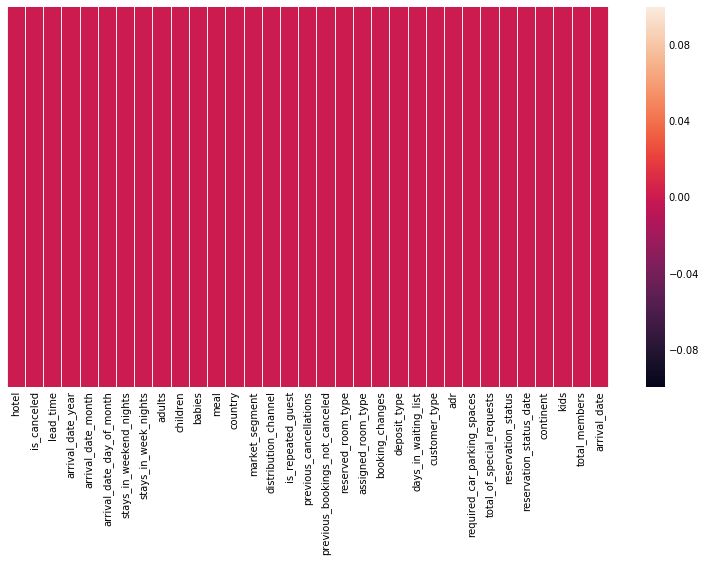

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(bookings.isnull(), yticklabels=False)
plt.show()

In [21]:
confirmed_bookings = bookings[bookings.is_canceled=='0']

In [22]:
confirmed_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,continent,kids,total_members,arrival_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Europe,0.0,2.0,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Europe,0.0,2.0,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,Europe,0.0,1.0,2015-07-01
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,Europe,0.0,1.0,2015-07-01
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,Transient,98.0,0,1,Check-Out,2015-07-03,Europe,0.0,2.0,2015-07-01


### Monthly arrivals

In [23]:
# Attempt to find the most preferred month to arrive at the hotel
import datetime as dt
confirmed_bookings['arrival_month'] = bookings['arrival_date'].dt.month
confirmed_bookings.arrival_month.value_counts().sort_index()

1     4122
2     5372
3     6645
4     6565
5     7114
6     6404
7     7919
8     8638
9     6392
10    6914
11    4672
12    4409
Name: arrival_month, dtype: int64

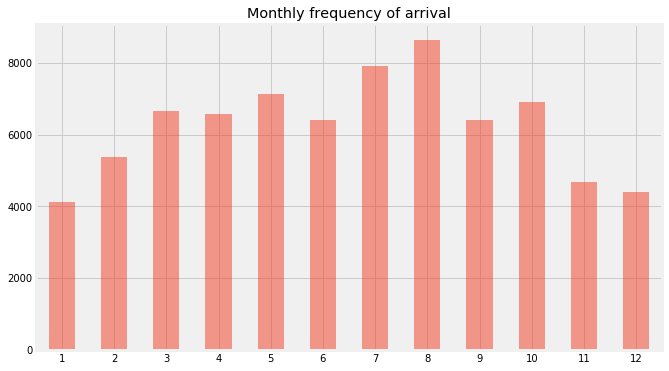

In [24]:
plt.figure(figsize=(12,5))
#sns.set(style='white')
(confirmed_bookings.arrival_month.value_counts().sort_index()).plot(kind='bar',
                    figsize=(10,6), title = 'Monthly frequency of arrival', color='#f03b20', alpha=0.5)
plt.xticks(rotation='horizontal')
plt.show()

### length of stay preference

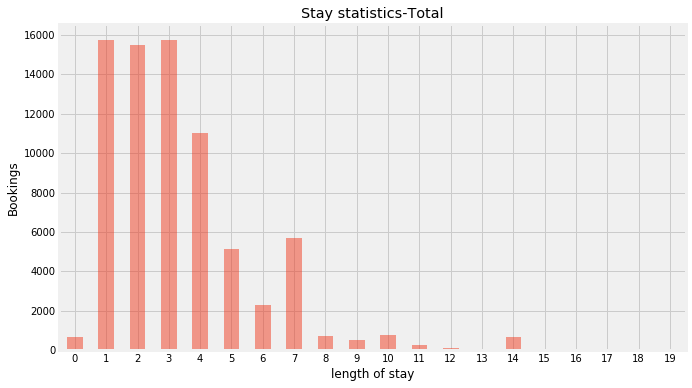

In [25]:
# Plotting the length of stay 
confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights
length_of_stay = confirmed_bookings.total_span_of_stay.value_counts().sort_index()
length_of_stay.head(20).plot(kind='bar', figsize=(10,6), title = 'length of stay', color='#f03b20', alpha=0.5)
plt.title('Stay statistics-Total')
plt.xlabel('length of stay')
plt.ylabel('Bookings')
plt.xticks(rotation='horizontal')
plt.show()

Just to have an idea of the preferred length of stay for city hotel and resort hotel seperately, we would divide the dataset to two

In [26]:
# Making dataframes seperately for City hotels and Resort hotels
conf_book_city = confirmed_bookings[confirmed_bookings.hotel=='City Hotel']
conf_book_resort = confirmed_bookings[confirmed_bookings.hotel=='Resort Hotel']

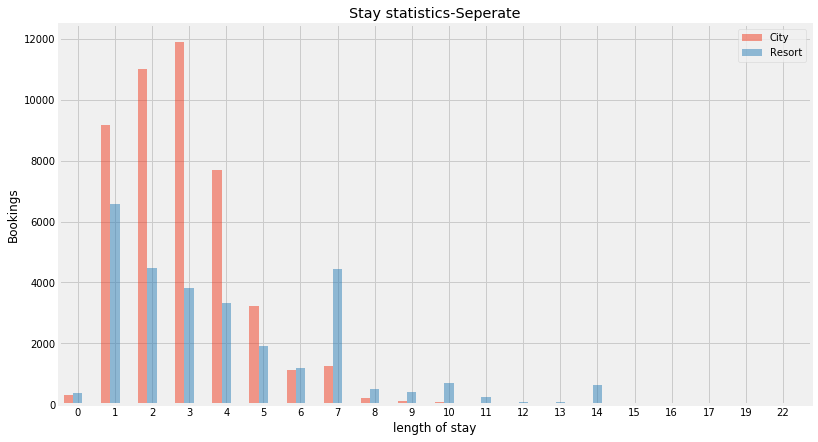

In [27]:
# variables_to_plot
city = conf_book_city.total_span_of_stay.value_counts().head(20).sort_index()
resort = conf_book_resort.total_span_of_stay.value_counts().head(20).sort_index()

position = list(range(len(city)))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
plt.bar([p for p in position], city, width, alpha=0.5, color='#f03b20', label='City')
plt.bar([p+width for p in position], resort, width, alpha=0.5, color='#2c7fb8', label='Resort')

ax.set_xticks([p + width for p in position])
ax.set_xticklabels(city.index)
plt.xlim(min(position)-width, max(position)+width*4)
plt.title('Stay statistics-Seperate')
plt.xlabel('length of stay')
plt.ylabel('Bookings')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


### Weekday statistics of check-in's

Text(0, 0.5, 'Days of the week')

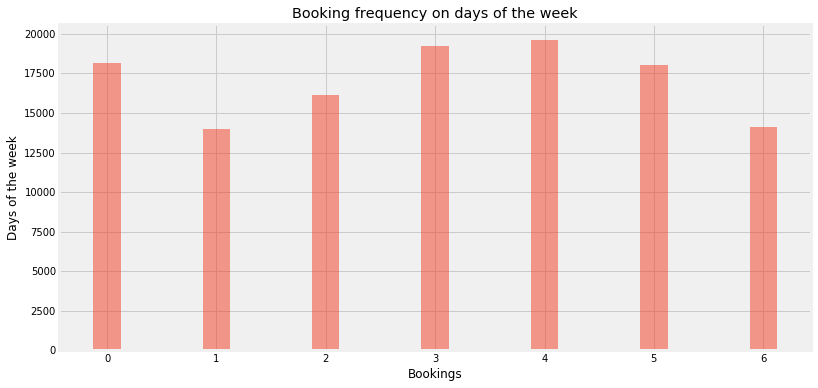

In [28]:
# Finding the weekday in which maximum check-in's happened
weekday = bookings.arrival_date.dt.weekday.value_counts().sort_index()

position = list(range(len(weekday))) 
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(position, weekday, width, alpha=0.5, color='#f03b20', label='Cancelled Bookings')

ax.set_xticks([p for p in position])
ax.set_xticklabels(city.index)
ax.set_title('Booking frequency on days of the week')
ax.set_xlabel('Bookings')
ax.set_ylabel('Days of the week')

### Booking pattern over the years

Text(0, 0.5, 'Number of Bookings')

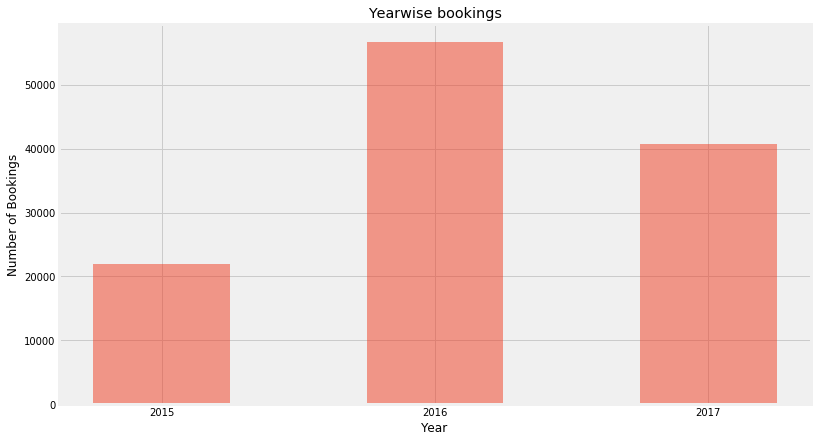

In [29]:
# Yearly data of check-in's
year = bookings.arrival_date.dt.year.value_counts().sort_index()
position = list(range(len(year))) 

fig, ax = plt.subplots(figsize=(12,7))
plt.bar(position, year, width=.50, alpha=0.5, color='#f03b20', label=year.index[0])

ax.set_xticks([p for p in position])
ax.set_xticklabels(year.index)
plt.title('Yearwise bookings')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')

It is oberved that the year 2017 witnessed most number of check-in's

### Price per night per person

In [30]:
confirmed_bookings['total_legit_members'] = confirmed_bookings.adults + confirmed_bookings.children
confirmed_bookings_copy = confirmed_bookings.drop(index=confirmed_bookings.loc[confirmed_bookings.total_legit_members==0].index, axis=0)
confirmed_bookings_copy['price_night_person'] = confirmed_bookings_copy.adr/confirmed_bookings_copy.total_legit_members
prices = confirmed_bookings_copy[['hotel', 'reserved_room_type', 'price_night_person']].sort_values('reserved_room_type')

In [31]:
prices.head()

,hotel,reserved_room_type,price_night_person
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40


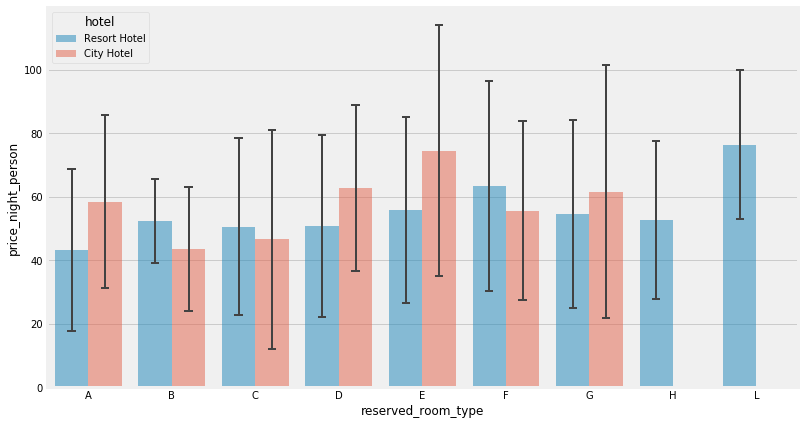

In [32]:
plt.figure(figsize=(12,7))

sns.barplot(x=confirmed_bookings_copy.reserved_room_type.sort_values(), y='price_night_person', hue='hotel', 
            data=confirmed_bookings_copy, alpha=0.5, ci='sd', errwidth=2, capsize=0.1)

### Room price variation over months

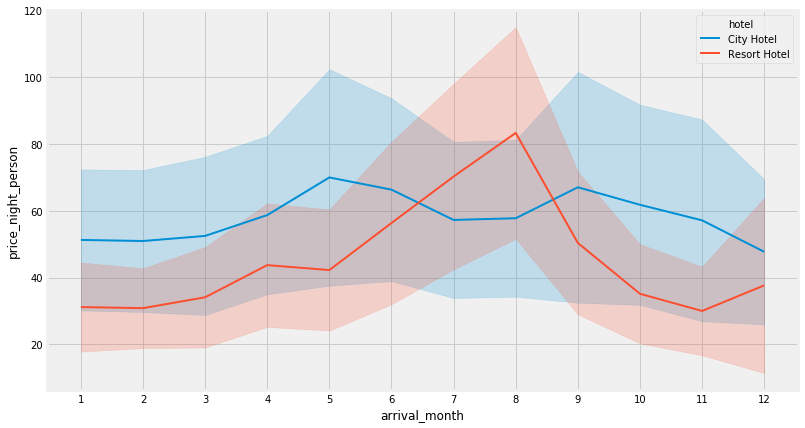

In [33]:
# Room price variation
price_variation = confirmed_bookings_copy[['hotel','arrival_month', 'price_night_person']].sort_values('arrival_month')
position = price_variation.arrival_month.value_counts().sort_index().index
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.lineplot(x='arrival_month', y='price_night_person', hue='hotel', data=price_variation, ci='sd')
ax.set_xticks([p for p in position])
ax.set_xticklabels(position)
plt.show()


In [34]:
# Treating Categorical Variables
# Finding the categorical variables
categorical = [var for var in bookings.columns if bookings[var].dtypes=='object']
categorical

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'continent']

In [35]:
# Numerical features are:
numerical = [var for var in bookings.columns if bookings[var].dtypes!='object']
numerical

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'kids',
 'total_members',
 'arrival_date']

### Outliers treatment

In [36]:
# Few of the features seeming illogical or causing trouble are removed
numerical = ['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'kids']
categorical = ['is_canceled',
 'hotel',
 'meal',
 'continent',
 'is_repeated_guest',
 'market_segment',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [37]:
# Removing the Outliers
# find outliers for Rainfall variable
for j in numerical:
    IQR = bookings[j].quantile(0.75) - bookings[j].quantile(0.25)
    Lower_fence = bookings[j].quantile(0.25) - (IQR * 3)
    Upper_fence = bookings[j].quantile(0.75) + (IQR * 3)
    print(j + ' outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


lead_time outliers are values < -408.0 or > 586.0
stays_in_weekend_nights outliers are values < -6.0 or > 8.0
stays_in_week_nights outliers are values < -5.0 or > 9.0
adults outliers are values < 2.0 or > 2.0
previous_cancellations outliers are values < 0.0 or > 0.0
previous_bookings_not_canceled outliers are values < 0.0 or > 0.0
booking_changes outliers are values < 0.0 or > 0.0
days_in_waiting_list outliers are values < 0.0 or > 0.0
adr outliers are values < -100.83999999999999 or > 296.13
required_car_parking_spaces outliers are values < 0.0 or > 0.0
total_of_special_requests outliers are values < -3.0 or > 4.0
kids outliers are values < 0.0 or > 0.0


In [38]:
for k in numerical:
    print("the min and max values of " + k + " are {} and {}".format(bookings[k].min(), bookings[k].max()))

the min and max values of lead_time are 0 and 737
the min and max values of stays_in_weekend_nights are 0 and 19
the min and max values of stays_in_week_nights are 0 and 50
the min and max values of adults are 0 and 55
the min and max values of previous_cancellations are 0 and 26
the min and max values of previous_bookings_not_canceled are 0 and 72
the min and max values of booking_changes are 0 and 21
the min and max values of days_in_waiting_list are 0 and 391
the min and max values of adr are -6.38 and 5400.0
the min and max values of required_car_parking_spaces are 0 and 8
the min and max values of total_of_special_requests are 0 and 5
the min and max values of kids are 0.0 and 10.0


### Outliers are : 
#### lead_time > 586.0
#### stays_in_weekend_nights > 8
#### stays_in_week_nights > 9
#### adults > 2
#### is_repeated_guest > 0
#### previous_cancellations > 0
#### previous_bookings_not_canceled > 0
#### booking_changes > 0
#### days_in_waiting_list > 0
#### adr > 296.13
#### required_car_parking_spaces > 0
#### total_of_special_requests > 4
#### kids > 0
#### total_members > 2

In [39]:
def max_value(bookings, variable, top):
    return np.where(bookings[variable]>top, top, bookings[variable])
bookings['lead_time'] = max_value(bookings,'lead_time',586)
bookings['stays_in_weekend_nights'] = max_value(bookings,'stays_in_weekend_nights',8)
bookings['stays_in_week_nights'] = max_value(bookings,'stays_in_week_nights',9)
bookings['adults'] = max_value(bookings,'adults',2)
bookings['previous_cancellations'] = max_value(bookings,'previous_cancellations',0)
bookings['previous_bookings_not_canceled'] = max_value(bookings,'previous_bookings_not_canceled',0)
bookings['booking_changes'] = max_value(bookings,'booking_changes',0)
bookings['days_in_waiting_list'] = max_value(bookings,'days_in_waiting_list',0)
bookings['adr'] = max_value(bookings,'adr',296.13)
bookings['required_car_parking_spaces'] = max_value(bookings,'required_car_parking_spaces',0)
bookings['total_of_special_requests'] = max_value(bookings,'total_of_special_requests',4)
bookings['kids'] = max_value(bookings,'kids',0)   

### Concatinating Dummies

In [40]:
for i in categorical:
    bookings = pd.concat([bookings, pd.get_dummies(bookings[i], drop_first=True)], axis=1)

### Features, Labels and train_test_split

In [41]:
X = bookings.drop(['is_canceled', 'hotel', 'meal', 'is_repeated_guest', 'market_segment', 'reserved_room_type',
                   'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status','arrival_date_month', 'country',
                  'distribution_channel','reservation_status_date','arrival_date','continent'], axis=1)
y = bookings.is_canceled

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

### Scaling using StandarsScaler

In [43]:
#Scaling
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###  Classification using Logistic Regression

In [44]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

1.0

In [47]:
confusion_matrix(y_test, y_pred)

array([[14934,     0],
       [    0,  8944]], dtype=int64)

In [48]:
y_pred = y_pred.astype('object')

In [49]:
print("Accuracy score  : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test, y_pred, pos_label='0'))
print("Recall score : ", recall_score(y_test, y_pred, pos_label='0'))

Accuracy score  :  1.0
Precision :  1.0
Recall score :  1.0
